# Early Detection of COVID-19 from Chest X-ray.
# Deep Learning - CNN Model

Dataset https://github.com/ieee8023/covid-chestxray-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers

In [ ]:
#Initializing the CNN
#There is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


In [ ]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#step -3 Flattening
classifier.add(Flatten())

In [ ]:
#step-4 Full connection step
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
#binary outcome

In [ ]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/CovidDataset/Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/CovidDataset/Val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
#We'll try to train with 100 Epochs
results=classifier.fit(
        training_set,
        steps_per_epoch=4,
        epochs=100,
        validation_data=test_set,
        validation_steps=2)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/100
4/4 [==============================] - 7s 2s/step - loss: 0.3341 - accuracy: 0.8750 - val_loss: 0.3494 - val_accuracy: 0.8833
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 0.4029 - accuracy: 0.8047 - val_loss: 0.3279 - val_accuracy: 0.9333
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 0.3601 - accuracy: 0.8594 - val_loss: 0.3305 - val_accuracy: 0.9333
Epoch 4/100
4/4 [==============================] - 6s 2s/step - loss: 0.2859 - accuracy: 0.8906 - val_loss: 0.3694 - val_accuracy: 0.8333
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 0.3975 - accuracy: 0.8203 - val_loss: 0.3285 - val_accuracy: 0.9333
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 0.2802 - accuracy: 0.8984 - val_loss: 0.3378 - val_accuracy: 0.9000
Epoch 7/100
4/4 [==============================] - 6s 2s/step - loss: 0.3443 - accuracy: 0.

ValueError: ignored

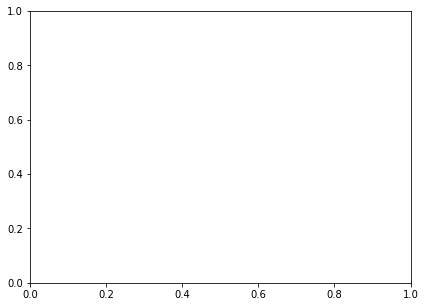

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 100)

In [ ]:
# Part 3 - Making new predictions
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)


{'Covid': 0, 'Normal': 1}


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


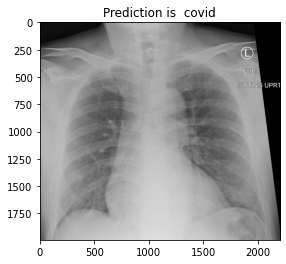

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/drive/MyDrive/CovidDataset/Val/Covid/16654_1_1.png')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/drive/MyDrive/CovidDataset/Val/Covid/16654_1_1.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


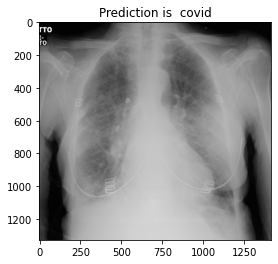

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/drive/MyDrive/CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('/content/drive/MyDrive/CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction is  '+ prediction )

#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


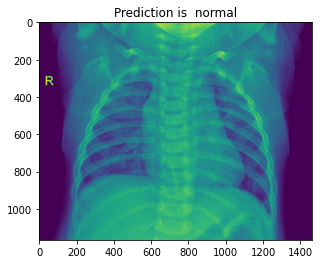

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/drive/MyDrive/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('/content/drive/MyDrive/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )